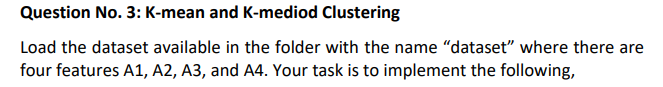

In [81]:
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np

In [82]:
# Load dataset from the "dataset" folder
data = pd.read_excel("Data.xlsx")

# Rename the features to A1, A2, A3, A4
data.columns = ['A1', 'A2', 'A3', 'A4']

In [83]:
data

,A1,A2,A3,A4
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4
...,...,...,...,...
144,6.7,3.0,5.2,2.3
145,6.3,2.5,5.0,1.9
146,6.5,3.0,5.2,2.0
147,6.2,3.4,5.4,2.3


In [84]:
def euclidean_distance(a, b):
    return (sum([(a[i] - b[i]) ** 2 for i in range(len(a))])) ** 0.5



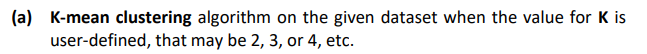

In [85]:
#K-MEAN CLUSTERING
def k_means(data, k):
    centroids = random.choices(data.values, k=k)
    assignments = [0] * len(data)

    while True:
        # Assign points to the nearest centroid
        for i, point in enumerate(data.values):
            assignments[i] = min(range(k), key=lambda j: euclidean_distance(point, centroids[j]))

        # Calculate the mean of the points in each cluster and update the centroids
        new_centroids = [[0] * len(data.columns) for _ in range(k)]
        counts = [0] * k

        for i, point in enumerate(data.values):
            for j in range(len(data.columns)):
                new_centroids[assignments[i]][j] += point[j]
            counts[assignments[i]] += 1

        for i in range(k):
            for j in range(len(data.columns)):
                new_centroids[i][j] /= counts[i]

        if np.array_equal(new_centroids, centroids):
            break

        centroids = new_centroids

    return centroids, assignments


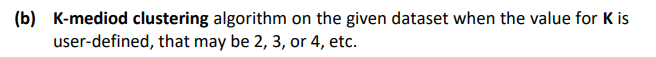

In [86]:
#K-MEDIOD CLUSTERING
def k_medoid(data, k):
    medoids = random.sample(data.values.tolist(), k)
    assignments = [0] * len(data)

    while True:
        # Assign points to the nearest medoid
        for i, point in enumerate(data.values):
            assignments[i] = min(range(k), key=lambda j: euclidean_distance(point, medoids[j]))

        # Update medoids
        new_medoids = medoids.copy()

        for i in range(k):
            cluster_points = [data.values[j] for j in range(len(data)) if assignments[j] == i]
            medoid_index = min(range(len(cluster_points)), key=lambda j: sum(euclidean_distance(cluster_points[j], p) for p in cluster_points))
            new_medoids[i] = cluster_points[medoid_index]

        if np.array_equal(new_medoids, medoids):
            break

        medoids = new_medoids

    return medoids, assignments



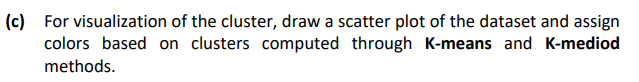

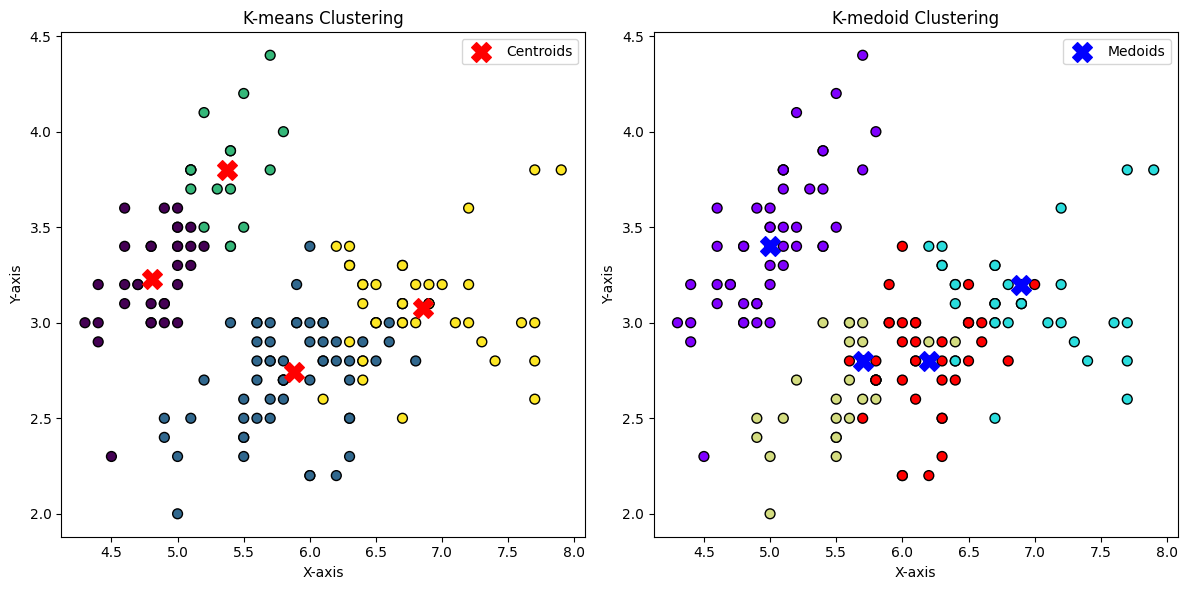

In [87]:
#VISUALIZE THE K-MEAN AND K-MEDIOD
def visualize_clusters(data, k_means_centroids, k_medoid_medoids, k_means_assignments, k_medoid_assignments):
    plt.figure(figsize=(12, 6))

    # Scatter plot for K-means
    plt.subplot(1, 2, 1)
    plt.scatter(data[data.columns[0]], data[data.columns[1]], c=k_means_assignments, cmap='viridis', edgecolor='k', s=50)
    plt.scatter(np.array(k_means_centroids)[:, 0], np.array(k_means_centroids)[:, 1], marker='X', s=200, c='red', label='Centroids')
    plt.title('K-means Clustering')
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend()

    # Scatter plot for K-medoid on the same plot
    plt.subplot(1, 2, 2)
    plt.scatter(data[data.columns[0]], data[data.columns[1]], c=k_medoid_assignments, cmap='rainbow', edgecolor='k', s=50)
    plt.scatter(np.array(k_medoid_medoids)[:, 0], np.array(k_medoid_medoids)[:, 1], marker='X', s=200, c='blue', label='Medoids')  # Change color for distinction
    plt.title('K-medoid Clustering')
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend()

    plt.tight_layout()
    plt.show()


k = 4


k_means_centroids, k_means_assignments = k_means(data, k)


k_medoid_medoids, k_medoid_assignments = k_medoid(data, k)


visualize_clusters(data, k_means_centroids, k_medoid_medoids, k_means_assignments, k_medoid_assignments)